<a href="https://colab.research.google.com/github/kang-narae/AI-DL-DA/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/titanic_%EC%83%9D%EC%A1%B4%EC%9C%A8%EC%98%88%EC%B8%A1_%EC%9B%90%ED%95%AB%EC%9D%B8%EC%BD%94%EB%8D%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 원핫인코더 방식으로 titanic 생존율 예측하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 우선 데이터셋 불러옴

In [ ]:
raw_data= sns.load_dataset('titanic')
print(raw_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [ ]:
print(raw_data.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


#결측값 있는 column : 삭제 혹은 대체

In [ ]:
clean_data= raw_data.dropna(axis=1, thresh=500)   #컬럼기준으로 넌값 500개이상인거 지우겠다
print(clean_data.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


In [ ]:
mean_age= clean_data['age'].mean()
print(mean_age)

29.69911764705882


In [ ]:
clean_data['age'].fillna(mean_age, inplace=True)
print(clean_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
4    man        True  Southampton    no   True  


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


# 중복컬럼 삭제

In [ ]:
clean_data.drop(['embark_town', 'alive'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
print(clean_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  alone  
0    man        True  False  
1  woman       False  False  
2  woman       False   True  
3  woman       False  False  
4    man        True   True  


In [ ]:
clean_data['embarked'].fillna(
    method='ffill', inplace=True
)
print(clean_data.isnull().sum())

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB
None


#요인값(독립변수)과 타겟값(종속변수,정답) 분리.
#요인값:traing_data / 타겟값: target

In [ ]:
label = list(clean_data.columns)
keep= label.pop(0)  #0번껄 빼옴
target = clean_data[[keep]]   #생존값 즉 결과 정답값. 타겟값.
training_data = clean_data[label]  #다른 요인값들
print(training_data.head())
print(target.head())



   pclass     sex   age  sibsp  parch     fare embarked  class    who  \
0       3    male  22.0      1      0   7.2500        S  Third    man   
1       1  female  38.0      1      0  71.2833        C  First  woman   
2       3  female  26.0      0      0   7.9250        S  Third  woman   
3       1  female  35.0      1      0  53.1000        S  First  woman   
4       3    male  35.0      0      0   8.0500        S  Third    man   

   adult_male  alone  
0        True  False  
1       False  False  
2       False   True  
3       False  False  
4        True   True  
   survived
0         0
1         1
2         1
3         1
4         0


# 원핫인코더로 못 바꾸는 애들은 value_data로

In [ ]:
value_data= training_data[['age', 'fare']]
print(value_data.head())

    age     fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500


# value_data 0~1 사이로 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_data = scaler.fit_transform(value_data)
value_data = pd.DataFrame(scaled_data, columns=value_data.columns)
print(value_data.describe())

                age          fare
count  8.910000e+02  8.910000e+02
mean   2.562796e-16 -4.373606e-17
std    1.000562e+00  1.000562e+00
min   -2.253155e+00 -6.484217e-01
25%   -5.924806e-01 -4.891482e-01
50%    0.000000e+00 -3.573909e-01
75%    4.079260e-01 -2.424635e-02
max    3.870872e+00  9.667167e+00


In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pclass      891 non-null    int64   
 1   sex         891 non-null    object  
 2   age         891 non-null    float64 
 3   sibsp       891 non-null    int64   
 4   parch       891 non-null    int64   
 5   fare        891 non-null    float64 
 6   embarked    891 non-null    object  
 7   class       891 non-null    category
 8   who         891 non-null    object  
 9   adult_male  891 non-null    bool    
 10  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(3)
memory usage: 58.6+ KB


# training_data에서 value값 컬럼들 뺌

In [ ]:
training_data.drop(['age','fare'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# pd.get_dummies함수 이용하여 training_data를 원핫 데이터 객체로 

In [ ]:
onehot_data= pd.get_dummies(training_data, columns= training_data.columns)   #디폴트로는 int타입은 안해주니까 columns에 전체 컬럼 넣는다고 대입함.
               #training_data를 get_dummies함수로 원핫데이터로 바꿈.
print(onehot_data.head())

   pclass_1  pclass_2  pclass_3  sex_female  sex_male  sibsp_0  sibsp_1  \
0         0         0         1           0         1        0        1   
1         1         0         0           1         0        0        1   
2         0         0         1           1         0        1        0   
3         1         0         0           1         0        0        1   
4         0         0         1           0         1        1        0   

   sibsp_2  sibsp_3  sibsp_4  ...  class_First  class_Second  class_Third  \
0        0        0        0  ...            0             0            1   
1        0        0        0  ...            1             0            0   
2        0        0        0  ...            0             0            1   
3        0        0        0  ...            1             0            0   
4        0        0        0  ...            0             0            1   

   who_child  who_man  who_woman  adult_male_False  adult_male_True  \
0          0   

In [ ]:
print(onehot_data.info())
print(training_data.shape)
print(target.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   pclass_1          891 non-null    uint8
 1   pclass_2          891 non-null    uint8
 2   pclass_3          891 non-null    uint8
 3   sex_female        891 non-null    uint8
 4   sex_male          891 non-null    uint8
 5   sibsp_0           891 non-null    uint8
 6   sibsp_1           891 non-null    uint8
 7   sibsp_2           891 non-null    uint8
 8   sibsp_3           891 non-null    uint8
 9   sibsp_4           891 non-null    uint8
 10  sibsp_5           891 non-null    uint8
 11  sibsp_8           891 non-null    uint8
 12  parch_0           891 non-null    uint8
 13  parch_1           891 non-null    uint8
 14  parch_2           891 non-null    uint8
 15  parch_3           891 non-null    uint8
 16  parch_4           891 non-null    uint8
 17  parch_5           891 non-null    u

# 원핫데이터와 value데이터 합침

In [ ]:
training_data= pd.concat((onehot_data, value_data), axis=1)   #원핫데이터랑, 원핫데이터로 안바꿔진 valuedata 합친 걸 training_data로 받음

print(training_data.info())
print(training_data.shape)
print(target.shape)

# training_data 쪼갠다.
# 입력_ training/ 입력_ test / 결과_training / 결과_test용 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    training_data, target, test_size=0.2
)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(712, 34) (712, 1)
(179, 34) (179, 1)


# 모델 만들자

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### 컬럼 34개니까 input_dim = 34
### 이진분류니까 마지막은 sigmoid

In [ ]:

model = Sequential()
model.add(Dense(128, input_dim = 34, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               4480      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 128)              

# 모델 학습시키자
### X_train 데이터와 Y_train 데이터 사용해서

In [ ]:
model.compile(loss='mse', optimizer = 'adam',         #모델 컴파일?? 무슨뜻이지??
              metrics=['binary_accuracy'])
fit_hist = model.fit(
    X_train, Y_train, batch_size=50, epochs=30,
    validation_split=0.2, verbose=1
)

Epoch 1/30
12/12 [==============================] - 2s 30ms/step - loss: 0.1917 - binary_accuracy: 0.7329 - val_loss: 0.1257 - val_binary_accuracy: 0.8322
Epoch 2/30
12/12 [==============================] - 0s 11ms/step - loss: 0.1461 - binary_accuracy: 0.8032 - val_loss: 0.1063 - val_binary_accuracy: 0.8392
Epoch 3/30
12/12 [==============================] - 0s 10ms/step - loss: 0.1301 - binary_accuracy: 0.8243 - val_loss: 0.1100 - val_binary_accuracy: 0.8392
Epoch 4/30
12/12 [==============================] - 0s 11ms/step - loss: 0.1255 - binary_accuracy: 0.8366 - val_loss: 0.1172 - val_binary_accuracy: 0.8392
Epoch 5/30
12/12 [==============================] - 0s 11ms/step - loss: 0.1238 - binary_accuracy: 0.8366 - val_loss: 0.1156 - val_binary_accuracy: 0.8322
Epoch 6/30
12/12 [==============================] - 0s 12ms/step - loss: 0.1183 - binary_accuracy: 0.8541 - val_loss: 0.1190 - val_binary_accuracy: 0.8252
Epoch 7/30
12/12 [==============================] - 0s 10ms/step - los

# 정확도 체크

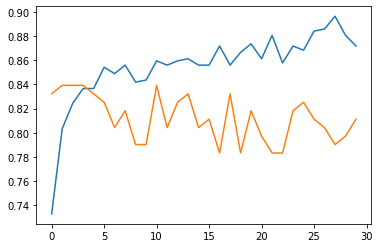

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fit_hist.history['binary_accuracy'])
plt.plot(fit_hist.history['val_binary_accuracy'])
plt.show()   #그림보니 5에폭정도가 적당할거같지

# 모델 평가

In [ ]:
score= model.evaluate(X_test, Y_test, verbose=0)
print('loss', score[0])
print('accuracy', score[1])

loss 0.1659363955259323
accuracy 0.7653631567955017
